In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import geopandas as gpd
import contextily as cx
import os
import seaborn as sns
import shapely as shp

In [2]:
# Distance totale

for csv_file in os.listdir("../data_clean"):
    if csv_file[-3:] == "csv":
        globals()[csv_file[:-4]] = pd.read_csv("../data_clean/" + csv_file)

In [3]:
orders = pd.read_csv("../scenario_2/orders_s2.csv")

In [4]:
orders

,Unnamed: 0,Unnamed: 0.1,order_id,package_id,package_volume,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume
0,0,0,EtPmaD3APj8aRNeSC3Yx7R,Z8722BWG8WfyrU3jeWsWGo,0.2732,Nice,Avignon,2021-01-01,2021-01-04 00:00:00,27.0,7.3764
1,1,1,4X4RBUwTXGBMVWdEj8Gti4,4oxrPXkner2kvXqvLQiCXF,0.2384,Issy-les-Moulineaux,Cergy,2021-01-01,2021-01-03 00:00:00,41.0,9.7744
2,2,2,GDhuTcBnr9xdRhFb2jLYcW,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Toulouse,Montauban,2021-01-01,2021-01-08 00:00:00,35.0,49.5320
3,3,3,3EZDvpzw5DdxXyJ66Py75J,3nwbxBUemtMG75cVPs7q7R,1.3451,Poitiers,Montauban,2021-01-01,2021-01-09 00:00:00,21.0,28.2471
4,4,4,Fpvw9NfnexSxjzLvyPWKbQ,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Épinal,Reims,2021-01-01,2021-01-09 00:00:00,22.0,31.1344
...,...,...,...,...,...,...,...,...,...,...,...
36126,36126,37001,jb82btLz8DFGCj5DRxeCYm,htoLtHv3Fuxv4ncvCaGhqv,0.0020,Saint-Maur-des-Fossés,Cergy,2021-06-28,2021-06-29 00:00:00,11.0,0.0220
36127,36127,37002,EP4cxv9xxgHo7eRfU9hGCE,CMSWwyZ9SfPoAqr6BsZws4,0.2590,Limoges,Montauban,2021-06-28,2021-06-29 00:00:00,17.0,4.4030
36128,36128,37003,XLds5k5ZntyPmz5LvBjage,Zvus8XQuxNr4GjWYptXEs5,0.0020,Saint-Nazaire,Rennes,2021-06-28,2021-06-29 00:00:00,44.0,0.0880
36129,36129,37004,RCxP43qv9xYGbARgFHHV5r,aZY3fiBNXajyPoPcgxBmM4,0.0020,Clichy,Cergy,2021-06-28,2021-06-29 00:00:00,37.0,0.0740


In [5]:
orders

,Unnamed: 0,Unnamed: 0.1,order_id,package_id,package_volume,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume
0,0,0,EtPmaD3APj8aRNeSC3Yx7R,Z8722BWG8WfyrU3jeWsWGo,0.2732,Nice,Avignon,2021-01-01,2021-01-04 00:00:00,27.0,7.3764
1,1,1,4X4RBUwTXGBMVWdEj8Gti4,4oxrPXkner2kvXqvLQiCXF,0.2384,Issy-les-Moulineaux,Cergy,2021-01-01,2021-01-03 00:00:00,41.0,9.7744
2,2,2,GDhuTcBnr9xdRhFb2jLYcW,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Toulouse,Montauban,2021-01-01,2021-01-08 00:00:00,35.0,49.5320
3,3,3,3EZDvpzw5DdxXyJ66Py75J,3nwbxBUemtMG75cVPs7q7R,1.3451,Poitiers,Montauban,2021-01-01,2021-01-09 00:00:00,21.0,28.2471
4,4,4,Fpvw9NfnexSxjzLvyPWKbQ,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Épinal,Reims,2021-01-01,2021-01-09 00:00:00,22.0,31.1344
...,...,...,...,...,...,...,...,...,...,...,...
36126,36126,37001,jb82btLz8DFGCj5DRxeCYm,htoLtHv3Fuxv4ncvCaGhqv,0.0020,Saint-Maur-des-Fossés,Cergy,2021-06-28,2021-06-29 00:00:00,11.0,0.0220
36127,36127,37002,EP4cxv9xxgHo7eRfU9hGCE,CMSWwyZ9SfPoAqr6BsZws4,0.2590,Limoges,Montauban,2021-06-28,2021-06-29 00:00:00,17.0,4.4030
36128,36128,37003,XLds5k5ZntyPmz5LvBjage,Zvus8XQuxNr4GjWYptXEs5,0.0020,Saint-Nazaire,Rennes,2021-06-28,2021-06-29 00:00:00,44.0,0.0880
36129,36129,37004,RCxP43qv9xYGbARgFHHV5r,aZY3fiBNXajyPoPcgxBmM4,0.0020,Clichy,Cergy,2021-06-28,2021-06-29 00:00:00,37.0,0.0740


In [6]:
cities[cities["city"]=="Épinal"]

,Unnamed: 0,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,is_warehouse,geometry
47,47,Épinal,48.1744,6.4512,France,FR,Grand Est,minor,93184.0,32223.0,False,POINT (6.4512 48.1744)


In [7]:
affecations = orders[["from_warehouse", "delivery_location"]].groupby("delivery_location").agg(lambda x:list(x)[0]).reset_index()

In [8]:
affecations.loc[affecations["from_warehouse"] == "Reims", "from_warehouse"] = "Épinal"

In [9]:
affecations_with_coords = pd.merge(affecations, cities[["city", "lat", "lng"]], left_on="delivery_location", right_on="city")

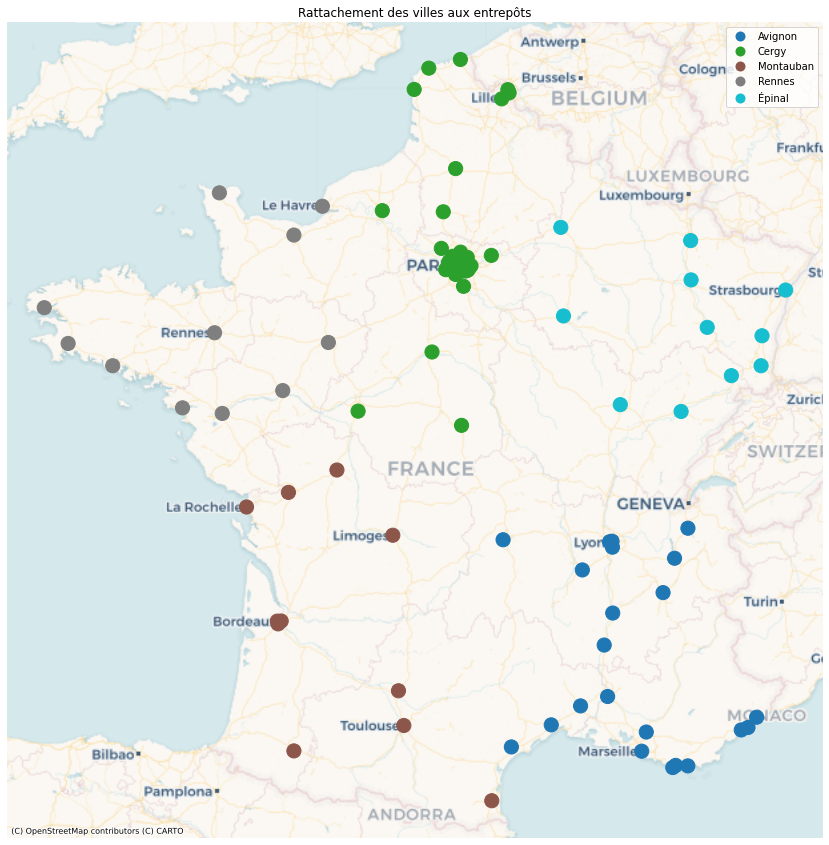

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf = gpd.GeoDataFrame(affecations_with_coords, geometry=gpd.points_from_xy(affecations_with_coords.lng, affecations_with_coords.lat), crs=4326)
gdf.to_crs(epsg=3857).plot(ax=ax, column="from_warehouse", legend=True, markersize=200)
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, zoom=6)
ax.axis('off')
ax.set_title("Rattachement des villes aux entrepôts")
plt.show()

In [11]:
def reaffect(warehouse):
    if warehouse == "Reims":
        return "Épinal"
    else:
        return warehouse

In [12]:
new_orders = orders.copy()
new_orders["from_warehouse"] = new_orders["from_warehouse"].apply(reaffect)

In [13]:
new_orders = new_orders.iloc[:, 2:]

In [14]:
new_orders.to_csv("./orders_s3.csv")

# Résultats

## Comparaison des taux de remplissage

In [15]:
new_routes3 = pd.read_csv("new_routes_s3.csv")
new_routes2 = pd.read_csv("../scenario_2/new_routes_s2.csv")
routes = pd.read_csv("../data_clean/new_routes.csv")

In [16]:
new_routes3

,Unnamed: 0,truck_id,duration,fill_volume,n_units,orders,from_warehouse,route_date,stops,total_distance
0,0,NaN,NaN,19.6518,340.0,A2nm2jbne7RScEwyP9afvh > 29nwqJyokudc2UbwNgmWF...,Avignon,2021-01-04,Avignon > Avignon > Nîmes > Montpellier > Cler...,1099.923
1,1,NaN,NaN,16.3947,60.0,SaSjshXMYZZKendwS8GoVE > d38YugvixtjfCq7j6rFqbB,Cergy,2021-01-04,Cergy > Colombes,37.252
2,2,NaN,NaN,79.6716,1096.0,HmwGkKaeXzC2hm4iAXzpjd > oFcCDeaXuFAUz3mGcCtvv...,Cergy,2021-01-04,Cergy > Nanterre > Rueil-Malmaison > Versaille...,1215.131
3,3,NaN,NaN,27.3693,303.0,gNvydNYZyX6aS2b5FC5uVZ > nAkUcqNLXBSCVv35brwvW...,Montauban,2021-01-04,Montauban > Niort > Bordeaux > Mérignac > Pau ...,1111.737
4,4,NaN,NaN,5.6810,86.0,ezJsG9YmgJLuaUjGk6BYmo > im4zcEpuTGUz7byYAgH4t...,Épinal,2021-01-04,Épinal > Épinal > Nancy > Metz > Strasbourg > ...,416.473
...,...,...,...,...,...,...,...,...,...,...
6579,6579,NaN,NaN,73.2537,72.0,UWbdP6AhoArfGxtr7hcMdE > St3m8f5VuAfvGoijRnAJrt,Épinal,2021-06-29,Épinal > Colmar > Colmar,135.820
6580,6580,NaN,NaN,70.2748,70.0,PsTgFSDCcyYdi2ciU4CSYB > 9shXJ4d24wzC8kgwtC6m8...,Épinal,2021-06-29,Épinal > Belfort,132.884
6581,6581,NaN,NaN,68.3291,338.0,UN8nN2SdNhLiA3KL3d5hBW > m6HfEPhtJqUJhmzcXVUgq...,Épinal,2021-06-29,Épinal > Épinal > Nancy > Metz > Reims > Troye...,686.878
6582,6582,NaN,NaN,22.4530,120.0,CN4NCQLhdoTYeMoX7qMqff > D9LQrqsRtCLzY2XUQ2nSn...,Rennes,2021-06-29,Rennes > Rennes,0.000


In [17]:
new_routes3["fill_rate"] = new_routes3["fill_volume"] / 81.25
new_routes2["fill_rate"] = new_routes2["fill_volume"] / 81.25
routes["fill_rate"] = routes["fill_volume"] / 81.25

Text(0.5, 1.0, 'Distribution des taux de remplissage des camions')

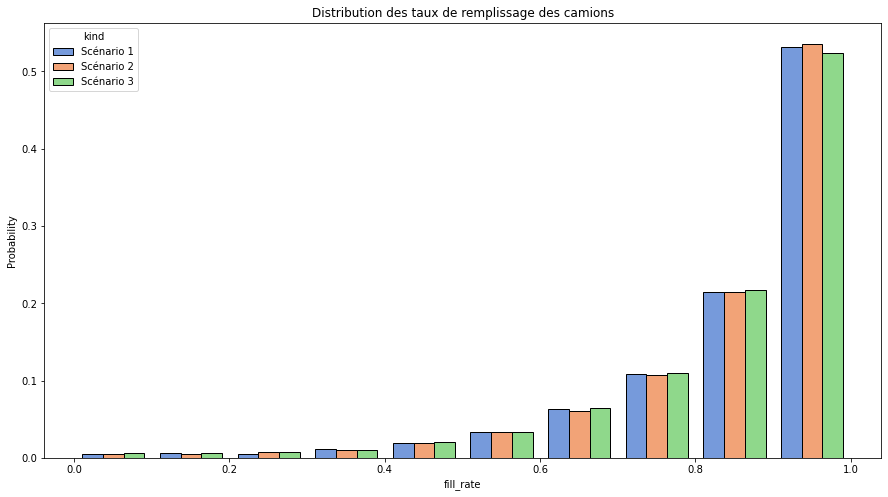

In [18]:
df_rates = pd.DataFrame(dict(fill_rate=routes.fill_rate, from_warehouse=routes.from_warehouse, kind=["Scénario 1"]*len(routes))).append(
    pd.DataFrame(dict(fill_rate=new_routes3.fill_rate, from_warehouse=new_routes3.from_warehouse, kind=["Scénario 3"]*len(new_routes3)))).reset_index().append(
        pd.DataFrame(dict(fill_rate=new_routes2.fill_rate, from_warehouse=new_routes2.from_warehouse, kind=["Scénario 2"]*len(new_routes2)))
    ).reset_index()
plt.figure(figsize=(15,8))
sns.histplot(x="fill_rate", hue="kind", data=df_rates, stat="probability", multiple="dodge", common_norm=False, bins=10, palette=sns.color_palette("muted")[:3], shrink=0.80, hue_order=["Scénario 1", "Scénario 2", "Scénario 3"])
plt.title("Distribution des taux de remplissage des camions")

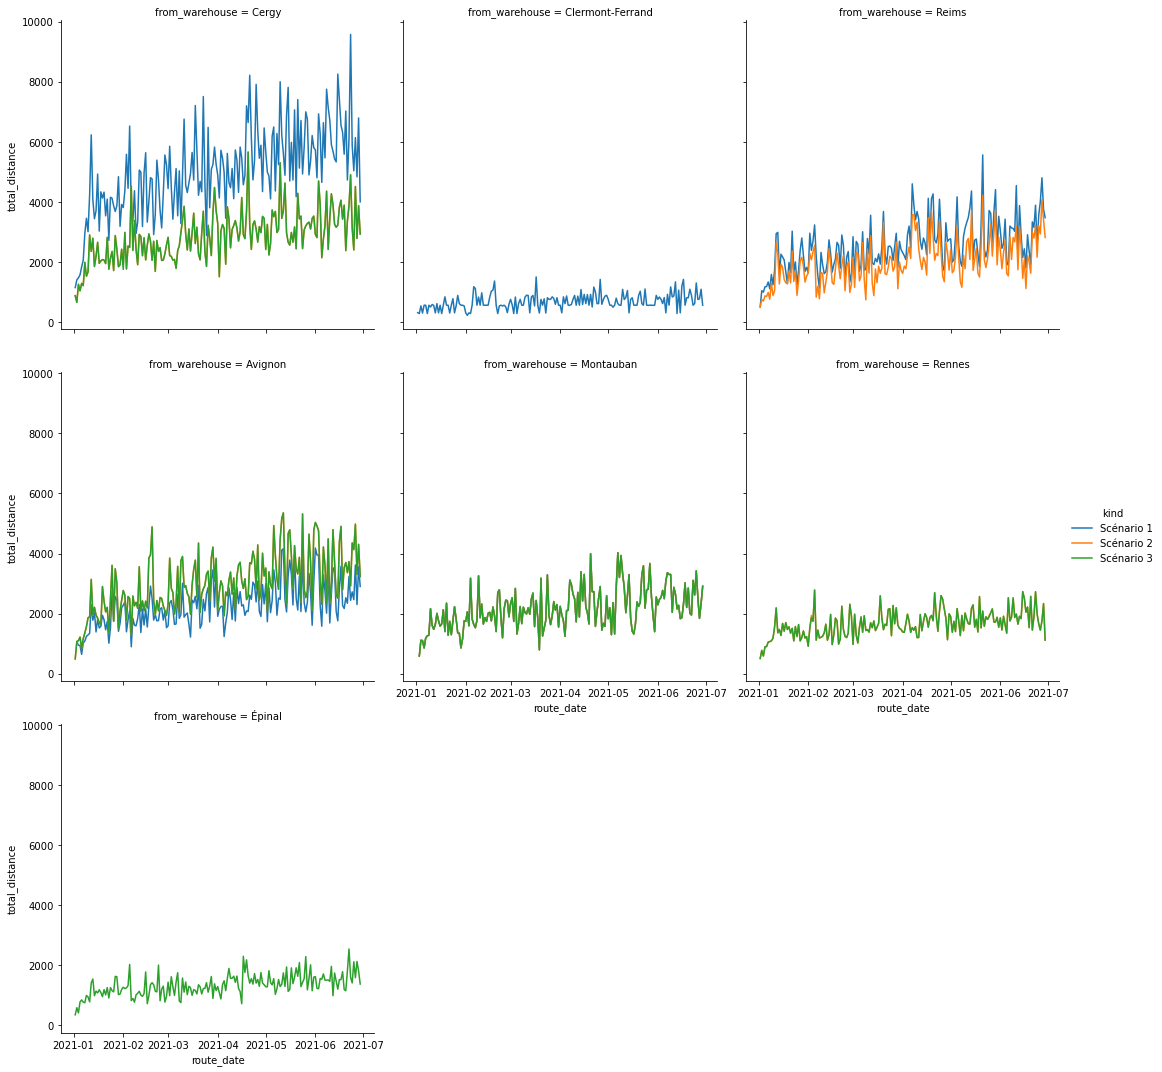

In [19]:
df1 = routes[["route_date", "total_distance", "from_warehouse"]].groupby(["route_date", "from_warehouse"]).agg("sum").reset_index()
df1["kind"] = "Scénario 1"
df2 = new_routes2[["route_date", "total_distance", "from_warehouse"]].groupby(["route_date", "from_warehouse"]).agg("sum").reset_index()
df2["kind"] = "Scénario 2"
df3 = new_routes3[["route_date", "total_distance", "from_warehouse"]].groupby(["route_date", "from_warehouse"]).agg("sum").reset_index()
df3["kind"] = "Scénario 3"

distances = df1.append(df2).append(df3)

distances["route_date"] = pd.to_datetime(distances["route_date"])

g = sns.FacetGrid(distances, col="from_warehouse", hue="kind", col_wrap=3, height=5)
g.map(sns.lineplot, "route_date", "total_distance")
g.add_legend()

In [20]:
routes.total_distance.sum()

2266636.145

In [21]:
new_routes3.total_distance.sum()

1965899.4959999998

In [22]:
routes.total_distance.sum() - new_routes3.total_distance.sum()

300736.6490000002

In [23]:
new_routes2.total_distance.sum() - new_routes3.total_distance.sum()

121591.32100000046

In [24]:
(routes.total_distance.sum() - new_routes3.total_distance.sum()) / routes.total_distance.sum() * 100

13.267971997331765

In [25]:
(new_routes2.total_distance.sum() - new_routes3.total_distance.sum()) / new_routes2.total_distance.sum() * 100

5.824759563481254

In [26]:
def create_path(stops):
    stops = stops.split(" > ")
    coordinates = []
    for stop in stops:
        city = cities[cities["city"] == stop].iloc[0]
        coordinates.append([city["lng"], city["lat"]])
    if len(coordinates) == 1:
        coordinates = 2*coordinates
    return shp.geometry.LineString(coordinates)

In [27]:
new_routes3["path"] = new_routes3["stops"].apply(create_path)

In [28]:
new_cmap = matplotlib.colors.ListedColormap([
    [178/255, 194/255, 250/255], 
    [85/255, 148/255, 177/255], 
    [184/255, 228/255, 239/255], 
    [26/255, 63/255, 235/255], 
    [50/255, 88/255, 106/255]])
hue_order = ["Cergy", "Épinal", "Avignon", "Montauban", "Rennes"]

In [29]:
cities.loc[cities["city"]=="Clermont-Ferrand", "is_warehouse"] = False
cities.loc[cities["city"]=="Rennes", "is_warehouse"] = True
cities.loc[cities["city"]=="Reims", "is_warehouse"] = False
cities.loc[cities["city"]=="Épinal", "is_warehouse"] = True

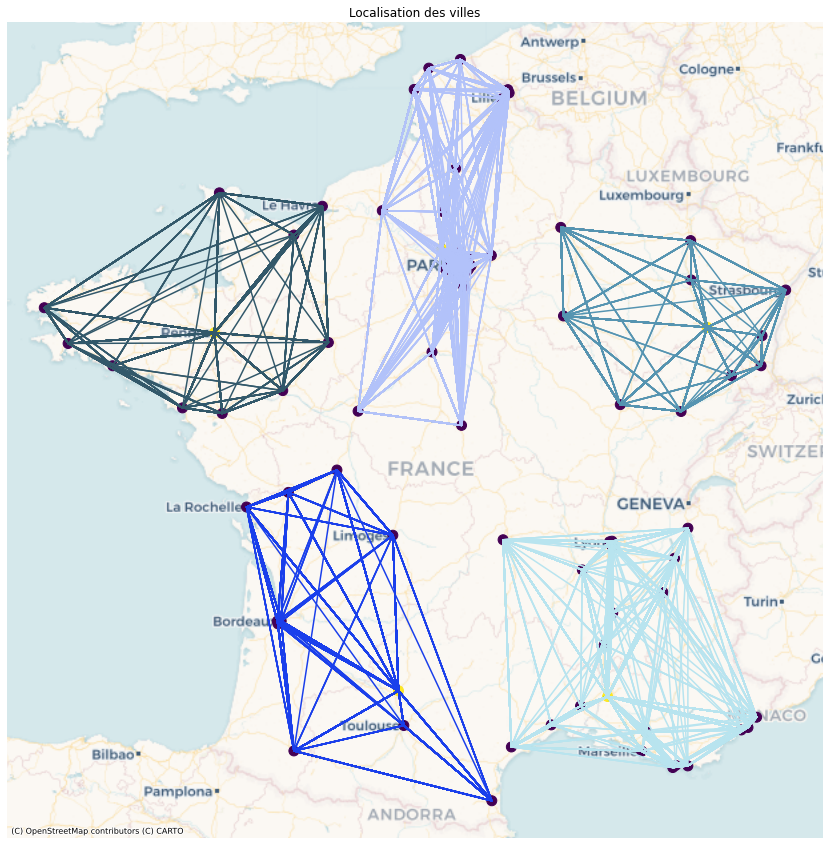

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))

gdf_cities = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.lng, cities.lat), crs=4326)
gdf_cities.to_crs(epsg=3857).plot(ax=ax, column="is_warehouse", markersize=100)

gdf = gpd.GeoDataFrame(new_routes3, geometry=new_routes3.path, crs=4326)
gdf.to_crs(epsg=3857).plot(ax=ax, column="from_warehouse", cmap=new_cmap, legend=False, categories=hue_order)

cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, zoom=6)
ax.axis('off')
ax.set_title("Localisation des villes")
plt.show()

# Résultats `delay=2`

In [31]:
new_routes3_2 = pd.read_csv("new_routes_s3_2.csv")

In [32]:
new_routes3_2["fill_rate"] = new_routes3_2["fill_volume"] / 81.25

Text(0.5, 1.0, 'Distribution des taux de remplissage des camions')

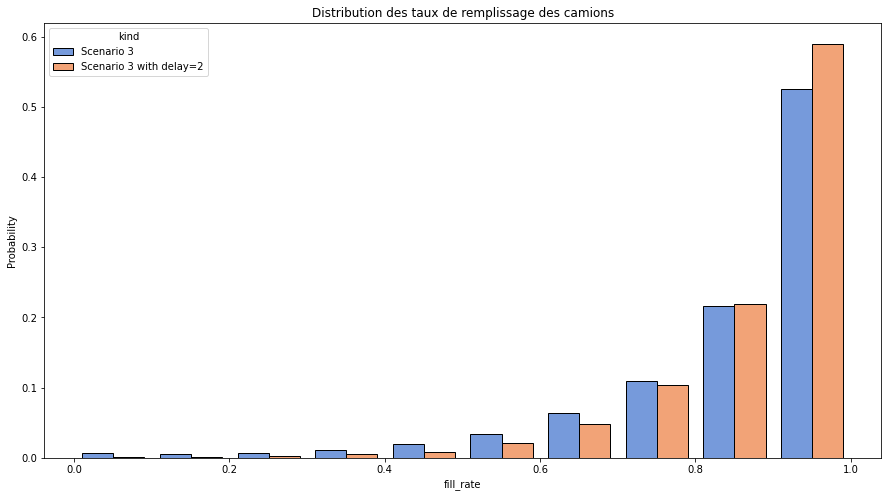

In [33]:
df_rates = pd.DataFrame(dict(fill_rate=new_routes3.fill_rate, from_warehouse=new_routes3.from_warehouse, kind=["Scenario 3"]*len(new_routes3))).append(
    pd.DataFrame(dict(fill_rate=new_routes3_2.fill_rate, from_warehouse=new_routes3_2.from_warehouse, kind=["Scenario 3 with delay=2"]*len(new_routes3_2)))).reset_index()
plt.figure(figsize=(15,8))
sns.histplot(x="fill_rate", hue="kind", data=df_rates, stat="probability", multiple="dodge", common_norm=False, bins=10, palette=sns.color_palette("muted")[:2], shrink=0.80)
plt.title("Distribution des taux de remplissage des camions")

In [34]:
df_rates.iloc[:, 1:].to_csv("../beautiful_graphs/fill_rates_slow.csv")

In [35]:
new_routes3_2.total_distance.sum()

1674638.803

In [36]:
(new_routes3.total_distance.sum() - new_routes3_2.total_distance.sum())/new_routes3.total_distance.sum()

0.14815645133061256

In [37]:
orders[:20].to_csv("../sub_orders.csv")

In [45]:
new_orders[(new_orders["delivered_date"]=="2021-06-24 00:00:00") &(new_orders["from_warehouse"]=="Cergy")][["order_id", "package_id", "package_volume", "delivery_location", "n_units", "order_total_volume"]].to_csv("../orders.csv")